# 連線以及讀取套件

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #專業繪圖套件

In [2]:
#連結到雲端硬碟的檔案
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 讀取資料

---
1.   分開存
2.   一起存



In [0]:
X = np.load('/content/drive/Team Drives/ML概論專題/data200_7.npy')
y = np.load('/content/drive/Team Drives/ML概論專題/target200_7.npy')

==============示範結束==============

# 分割訓練和測試集

In [4]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
print("data分割完成")

data分割完成


In [5]:
X_train =X_train.reshape(len(X_train),200,200,1)
X_test =X_test.reshape(len(X_test),200,200,1)
from keras.utils import np_utils#1-hot encoding
y_train = np_utils.to_categorical(y_train,7)
y_test = np_utils.to_categorical(y_test,7)

Using TensorFlow backend.


# 讀取一個CNN模型

In [0]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Flatten,Dropout,AlphaDropout #flatten是要將矩陣拉平成向量
from keras.layers import Conv2D,MaxPooling2D,regularizers #CNN與NN不同的地方在這
from keras.layers import ReLU,BatchNormalization
from keras.optimizers import SGD,Adam
import keras as kr

In [0]:
model = kr.models.load_model(r"/content/drive/Team Drives/ML概論專題/model_best.h5")#儲存模型
#在測試集上的正確率達到90%
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 200, 200, 64)      640       
_________________________________________________________________
activation_36 (Activation)   (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
activation_37 (Activation)   (None, 200, 200, 64)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 66, 66, 64)        0         
______________________

# 模型效能與成果

第 345 張
0=長條,1=直方,2=圓餅,3=泡泡,4=散點,5=折線圖,6=其他
預測為: 1
實際為: [0. 1. 0. 0. 0. 0. 0.]


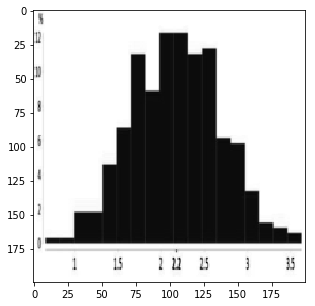

In [0]:
predict = model.predict_classes(X_test)
rad = np.random.randint(0,len(X_test))
print("第",rad,"張")
print('0=長條,1=直方,2=圓餅,3=泡泡,4=散點,5=折線圖,6=其他')
print("預測為:",predict[rad])
print("實際為:",y_test[rad])
image = X_test[rad].reshape(200,200)
plt.figure(num = 'haha' ,figsize=(5,5))
plt.imshow(image,cmap='gray')

In [0]:
(err,acc) = model.evaluate(X_test,y_test)
print("(err,acc) = ",(err,acc))

411/411 [==============================] - 1s 3ms/step
(err,acc) =  (0.8474069508902928, 0.9002433094375035)


In [0]:
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [0]:
classes = ['bar', 'hist', 'pie', 'bub', 'scat', 'line','fool']

In [0]:
index = np.argwhere(y_test == 1 )
#print(index)
print(index[:,1])
y_test_raw = index[:,1]

[4 3 1 5 2 2 0 3 5 2 6 3 6 5 3 4 2 4 3 6 0 1 1 6 1 1 0 3 2 0 2 2 6 0 3 5 6
 1 0 4 0 1 6 5 0 3 3 3 6 6 0 6 1 5 5 5 6 1 4 2 4 2 0 3 2 2 5 0 5 6 5 2 1 3
 5 2 3 4 6 2 1 6 1 6 2 3 4 5 2 2 6 6 1 3 3 5 6 2 6 2 6 0 5 2 6 0 0 2 1 3 3
 0 5 1 6 6 0 2 6 6 6 6 3 0 0 2 0 6 4 5 6 5 3 2 0 4 5 5 0 3 1 1 2 4 0 0 4 2
 4 4 6 1 4 5 2 2 3 2 1 1 3 5 3 2 6 4 0 1 4 6 5 3 1 3 0 4 1 2 2 4 2 6 2 0 3
 2 2 1 6 2 4 4 2 2 4 4 2 2 3 5 2 1 0 6 2 2 5 5 0 2 1 6 2 0 6 6 3 1 6 0 3 3
 4 1 0 3 3 2 1 2 2 0 3 2 4 2 5 0 6 3 3 1 5 6 0 4 0 5 5 5 4 5 3 4 1 3 4 5 0
 6 0 0 3 6 0 0 4 3 3 5 4 6 4 6 0 5 1 3 6 5 2 2 5 2 4 2 0 6 0 6 2 5 4 3 2 5
 4 5 5 6 1 6 2 4 1 0 2 0 3 2 3 0 2 1 6 1 0 4 4 6 6 3 1 5 1 0 4 5 2 2 2 3 3
 5 5 4 1 1 2 5 2 3 5 1 1 1 5 0 5 3 2 0 5 4 5 2 2 5 3 4 3 5 2 3 5 0 0 1 6 6
 0 1 2 3 4 0 2 2 4 3 5 3 1 2 4 6 1 4 0 5 4 2 3 2 1 2 3 4 1 6 6 3 6 2 2 6 3
 0 3 2 4]


Confusion matrix, without normalization


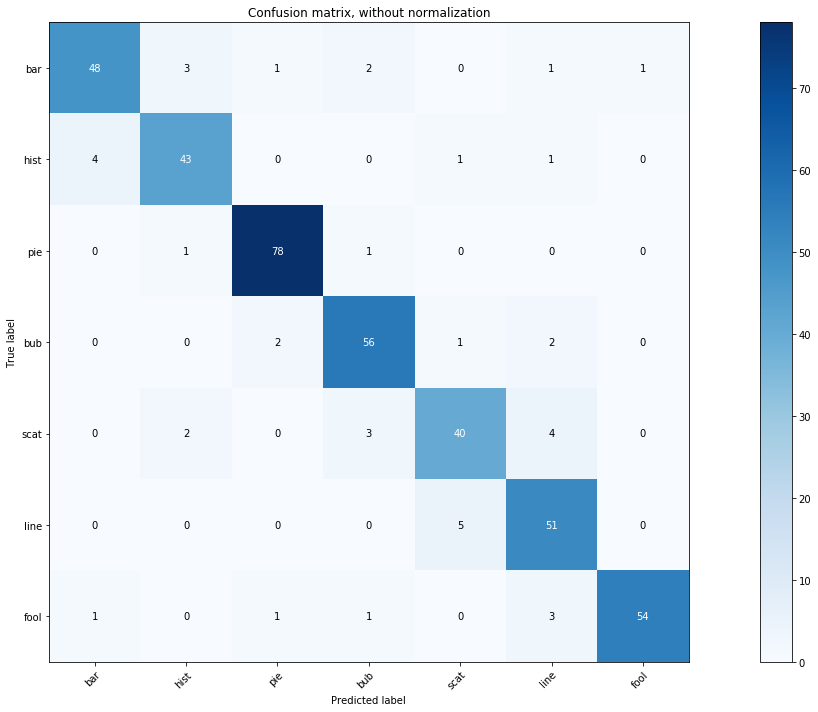

411/411 [==============================] - 1s 2ms/step
Accuracy: [0.8474069508902928, 0.9002433094375035]
              precision    recall  f1-score   support

         bar       0.91      0.86      0.88        56
        hist       0.88      0.88      0.88        49
         pie       0.95      0.97      0.96        80
         bub       0.89      0.92      0.90        61
        scat       0.85      0.82      0.83        49
        line       0.82      0.91      0.86        56
        fool       0.98      0.90      0.94        60

    accuracy                           0.90       411
   macro avg       0.90      0.89      0.89       411
weighted avg       0.90      0.90      0.90       411



In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
cmcnn = confusion_matrix(y_test_raw, y_pred)
plot_confusion_matrix(cmcnn,classes)

print('Accuracy:', model.evaluate(X_test,y_test))
print(classification_report(y_test_raw, y_pred, target_names=classes))

# 測驗看看新的數據集

In [0]:
#轉成灰階的函數
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
  
#img_gray = rgb2gray(img)
#plt.imshow(img_gray)

In [0]:
#讀入圖片並轉成灰階
from scipy import misc
Album = []
for i in range(1,411):
  img = plt.imread("/content/drive/Team Drives/ML概論專題/valid/valid ("+str(i)+").jpg")
  img = misc.imresize(img , (200,200))
  print(i)
  img = rgb2gray(img)/255
  Album.append(img)
  #print(len(Album))  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
X_val =Album#最後的再轉成array
X_val = np.array(X_val)
print(X_val.shape)
np.save('/content/drive/Team Drives/ML概論專題/valid200', X_val)

(410, 200, 200)


第 176 張
0=長條,1=直方,2=圓餅,3=泡泡,4=散點,5=折線圖,6=其他
預測為: 0


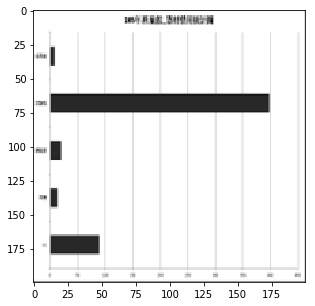

In [0]:
X_val =X_val.reshape(len(X_val),200,200,1)
predict = model.predict_classes(X_val)
rad = np.random.randint(0,len(X_val))
print("第",rad,"張")
print('0=長條,1=直方,2=圓餅,3=泡泡,4=散點,5=折線圖,6=其他')
print("預測為:",predict[rad])
image = X_val[rad].reshape(200,200)
plt.figure(num = 'haha' ,figsize=(5,5))
plt.imshow(image,cmap='gray')

# 訓練過程


In [22]:
model2 = Sequential()#最猛的model

model2.add(Conv2D(64,(3,3),padding='same',input_shape=(200,200,1)))
model2.add(Activation('relu'))
model2.add(Conv2D(64,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
model2.add(MaxPooling2D(pool_size=(3,3)))

model2.add(Conv2D(128,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))


model2.add(Conv2D(256,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(256,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))

model2.add(Conv2D(512,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(1024,(3,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('elu'))
model2.add(AlphaDropout(0.5))

model2.add(Dense(512))
model2.add(Activation('elu'))
model2.add(AlphaDropout(0.5))

model2.add(Dense(128))
model2.add(Activation('elu'))

model2.add(Dense(7))
model2.add(Activation('softmax'))

model2.compile(optimizer=Adam(lr=0.0003), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])#組裝神經網路
#CNN到此已完成!
model2.summary()
print("model2建立完成")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 200, 200, 64)      640       
_________________________________________________________________
activation_79 (Activation)   (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
activation_80 (Activation)   (None, 200, 200, 64)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 66, 66, 128)       73856     
__________

In [0]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
#model_early = EarlyStopping(monitor='val_acc', min_delta=0, patience=0, verbose=0, mode='max', restore_best_weights=True)
model_check = ModelCheckpoint(filepath = '/content/drive/Team Drives/ML概論專題/model_temp.h5',monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='max', period=1) 
history = model2.fit(X_train,y_train,batch_size=16,epochs=200,validation_data=(X_test,y_test),callbacks = [model_check])

Train on 956 samples, validate on 411 samples
Epoch 1/200
956/956 [==============================] - 9s 10ms/step - loss: 2.3678 - acc: 0.1872 - val_loss: 2.0463 - val_acc: 0.3236
Epoch 2/200
956/956 [==============================] - 7s 7ms/step - loss: 1.9387 - acc: 0.3013 - val_loss: 2.2457 - val_acc: 0.4209
Epoch 3/200
956/956 [==============================] - 7s 7ms/step - loss: 1.6661 - acc: 0.3860 - val_loss: 2.7406 - val_acc: 0.4185
Epoch 4/200
956/956 [==============================] - 7s 7ms/step - loss: 1.4048 - acc: 0.4948 - val_loss: 2.9722 - val_acc: 0.4477
Epoch 5/200
956/956 [==============================] - 7s 7ms/step - loss: 1.1752 - acc: 0.5690 - val_loss: 2.1007 - val_acc: 0.6156
Epoch 6/200
956/956 [==============================] - 7s 7ms/step - loss: 0.9474 - acc: 0.6538 - val_loss: 1.9450 - val_acc: 0.6496
Epoch 7/200
956/956 [==============================] - 7s 7ms/step - loss: 0.7527 - acc: 0.7165 - val_loss: 2.3252 - val_acc: 0.6569
Epoch 8/200
956/956 [=

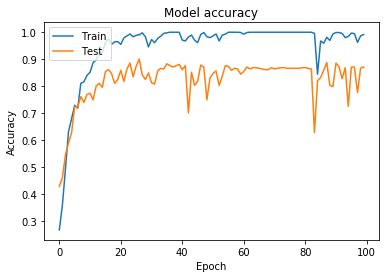

In [0]:
# 绘制训练 & 验证的准确率值
np.save('/content/drive/Team Drives/ML概論專題/training_history', history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model = kr.models.load_model(r"/content/drive/Team Drives/ML概論專題/model_best.h5")#儲存模型
#在測試集上的正確率達到88%
print('Accuracy:', model_best.evaluate(X_test,y_test))

411/411 [==============================] - 1s 2ms/step
Accuracy: [0.8474069508902928, 0.9002433094375035]


# 隱藏層的可視化

(411, 200, 200, 64)


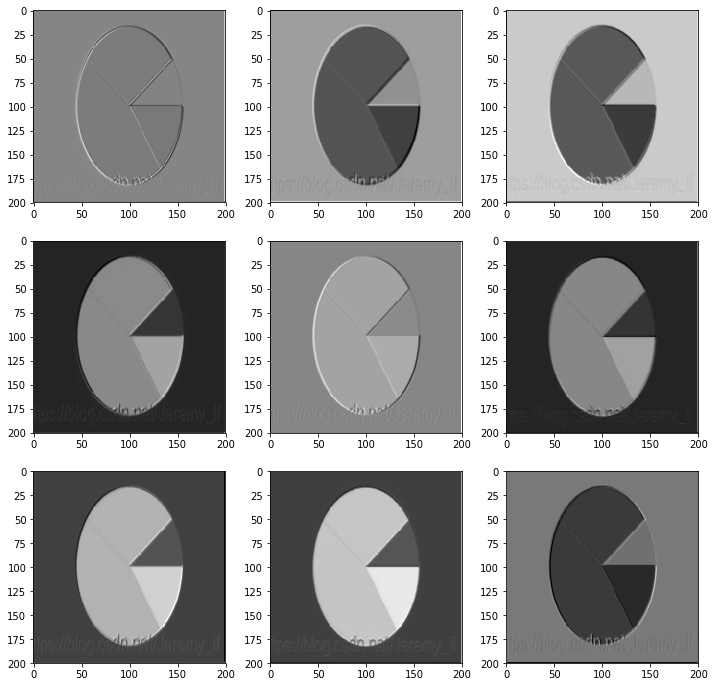

In [0]:
#submodel
rad = 5
from keras.models import Model
inter_layer_model = Model(inputs=model.input,outputs=model.get_layer('conv2d_25').output)

inter_output = inter_layer_model.predict(X_test)
print(inter_output.shape)
inter_img = inter_output[rad]

#第一層可視化
for i in range(1,10):
    plt.figure(num = '卷積核作用後' ,figsize=(12,12))
    plt.subplot( 3,3,i)
    plt.imshow(inter_img[:,:,i],cmap='gray')